In [1]:
import pandas as pd
data = pd.read_csv('mram_31148.csv')

In [2]:
data.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'patent_number',
       'patent_title', 'patent_date', 'patent_type', 'patent_abstract',
       'inventors', 'assignees', 'applications', 'IPCs', 'cited_patents',
       'citedby_patents', 'forward_citation', 'TCT', 'backward_citations',
       'inventor'],
      dtype='object')

In [3]:
df = pd.DataFrame()

In [4]:
df['contents'] = data['patent_abstract'] + data['patent_title']
df

,contents
0,A system architecture for a battery charger th...
1,A 3D semiconductor device including: a first l...
2,An integrated circuit including a first layer ...
3,"A 3D device, including: a first layer includin..."
4,"A 3D device, including: a first layer includin..."
...,...
31143,Disclosed is a computer-implemented method whi...
31144,The electrohydrodynamic print head comprises a...
31145,Apparatus (FIG. 1) receives electrical input p...
31146,In a selective call radio receiver for receivi...


## 단어 빈도 수 확인하기

In [5]:
import glob 
import nltk
from functools import reduce 
from nltk.tokenize import word_tokenize #토큰화
from nltk.corpus import stopwords #불용어
from nltk.stem import WordNetLemmatizer #표제어
from collections import Counter
import matplotlib.pyplot as plt
import re

In [6]:
stopWords=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

all_keyword=df['contents']
words=[]

for keyword in all_keyword:
    EnWords=re.sub(r"[^a-zA-Z]+"," ",str(keyword))
    EnWordsToken=word_tokenize(EnWords.lower())
    EnWordsTokenStop=[w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStop.append('nan')
    EnWordsTokenStopLemma=[lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
words=list(reduce(lambda x,y: x+y, words))

rm_set = {'nan'}
words_new = [i for i in words if i not in rm_set]
words_new

['system',
 'architecture',
 'battery',
 'charger',
 'employ',
 'gan',
 'based',
 'power',
 'device',
 'system',
 'take',
 'advantage',
 'active',
 'power',
 'electronics',
 'circuit',
 'power',
 'conversion',
 'utilizing',
 'control',
 'power',
 'factor',
 'correction',
 'input',
 'constant',
 'current',
 'constant',
 'voltage',
 'regulation',
 'output',
 'specifically',
 'universal',
 'gan',
 'based',
 'battery',
 'charger',
 'architecture',
 'proposed',
 'charging',
 'either',
 'low',
 'high',
 'voltage',
 'battery',
 'using',
 'either',
 'three',
 'phase',
 'v',
 'variable',
 'frequency',
 'three',
 'phase',
 'v',
 'constant',
 'frequency',
 'ac',
 'input',
 'power',
 'meeting',
 'stringent',
 'power',
 'quality',
 'electromagnetic',
 'interference',
 'aerospace',
 'requirement',
 'system',
 'architecture',
 'battery',
 'charger',
 'semiconductor',
 'device',
 'including',
 'first',
 'layer',
 'including',
 'first',
 'monocrystalline',
 'layer',
 'first',
 'layer',
 'including',
 '

In [7]:
# keyword frequency
count=Counter(words_new)
word_count=dict()

for tag,counts in count.most_common(50):
    if(len(str(tag))>3):
        word_count[tag]=counts
word_count

{'first': 46859,
 'layer': 41695,
 'device': 34724,
 'second': 34702,
 'memory': 32355,
 'magnetic': 30161,
 'method': 26989,
 'data': 21856,
 'includes': 21127,
 'system': 20866,
 'signal': 17488,
 'circuit': 15680,
 'element': 14887,
 'current': 13752,
 'cell': 13495,
 'voltage': 12683,
 'least': 12190,
 'plurality': 11885,
 'image': 11097,
 'control': 11007,
 'line': 10764,
 'field': 10462,
 'based': 10065,
 'region': 9901,
 'structure': 9804,
 'output': 9708,
 'power': 9572,
 'storage': 8809,
 'configured': 8738,
 'electrode': 8570,
 'apparatus': 8328,
 'switching': 8111,
 'input': 7978,
 'semiconductor': 7907,
 'using': 7835,
 'material': 7827,
 'transistor': 7697,
 'provided': 7661,
 'including': 7489,
 'source': 7385,
 'switch': 7346,
 'state': 7200,
 'operation': 6877,
 'coupled': 6652,
 'direction': 6627,
 'surface': 6604,
 'high': 6598,
 'portion': 6456}

## LDA

In [44]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops_list = ['magnetic random access memory','mram','magnetic','memory','semiconductor']

for word in stops_list:
    stops.append(word)

In [45]:
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import pickle
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

keyword2 = df[['contents']]

keyword2['clean_text'] = pd.Series(dtype='object')
keyword2['stopwords_after'] = pd.Series(dtype='object')
keyword2['pos_tag'] = pd.Series(dtype='object')
keyword2['NN'] = pd.Series(dtype='object')
keyword2['lemmatization'] = pd.Series(dtype='object')

def clean_text(texts):
    corpus = []
    
    for i in tqdm(range(0, len(texts))):
        
        patent_abstract = texts[i]
        
        patent_abstract = re.sub('[^a-zA-Z]', ' ', patent_abstract) # 특수문자 제거 
        patent_abstract = patent_abstract.lower().split()
        keyword2['clean_text'][i] = patent_abstract
        
        no_stops = [word for word in patent_abstract if not word in stops] # 불용어 제거
        keyword2['stopwords_after'][i] = no_stops
        
        tokens_pos = nltk.pos_tag(keyword2['stopwords_after'][i]) # pos tagging (품사 태깅)
        keyword2['pos_tag'][i] = tokens_pos
        
        NN_words = [] # 명사는 NN을 포함하고 있음을 알 수 있음(명사만 추출)
        for word, pos in tokens_pos:
            if 'NN' in pos:
                NN_words.append(word)
                keyword2['NN'][i] = NN_words
                
        wlem = nltk.WordNetLemmatizer() # Lemmatization(원형(lemma) 찾기) # nltk에서 제공되는 WordNetLemmatizer을 이용
        lemmatized_words = []
        for word in NN_words:
            new_word = wlem.lemmatize(word)
            if len(new_word) > 2: # 3글자 이상 표제어만 추출
                lemmatized_words.append(new_word)
                keyword2['lemmatization'][i] = lemmatized_words
        
        corpus.append(no_stops) 
        
    return corpus

In [47]:
keyword2

,contents,clean_text,stopwords_after,pos_tag,NN,lemmatization
0,A semiconductor memory device includes a memor...,NaN,NaN,NaN,NaN,NaN
1,A semiconductor memory device includes a cell ...,NaN,NaN,NaN,NaN,NaN
2,"In a memory cell array of an MRAM, a normal me...",NaN,NaN,NaN,NaN,NaN
3,"Disclosed are a fast, highly-integrated and hi...",NaN,NaN,NaN,NaN,NaN
4,A semiconductor device includes: a first magne...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
155,A method of forming a thin insulating layer in...,NaN,NaN,NaN,NaN,NaN
156,To simplify a method for manufacturing a memor...,NaN,NaN,NaN,NaN,NaN
157,Semiconductor device and methods of forming th...,NaN,NaN,NaN,NaN,NaN
158,A semiconductor device comprises a first condu...,NaN,NaN,NaN,NaN,NaN


In [48]:
clean_text(keyword2['contents'])

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [00:03<00:00, 43.64it/s]


[['device',
  'includes',
  'cell',
  'array',
  'mode',
  'register',
  'set',
  'test',
  'circuit',
  'cell',
  'array',
  'includes',
  'plurality',
  'wordlines',
  'plurality',
  'bitlines',
  'plurality',
  'spin',
  'transfer',
  'torque',
  'magneto',
  'resistive',
  'random',
  'access',
  'stt',
  'cells',
  'stt',
  'cell',
  'disposed',
  'cross',
  'area',
  'wordline',
  'bitline',
  'stt',
  'cell',
  'includes',
  'tunnel',
  'junction',
  'mtj',
  'element',
  'cell',
  'transistor',
  'gate',
  'cell',
  'transistor',
  'coupled',
  'wordline',
  'first',
  'electrode',
  'cell',
  'transistor',
  'coupled',
  'bitline',
  'via',
  'mtj',
  'element',
  'second',
  'electrode',
  'cell',
  'transistor',
  'coupled',
  'source',
  'line',
  'mode',
  'register',
  'set',
  'configured',
  'set',
  'test',
  'mode',
  'test',
  'circuit',
  'configured',
  'perform',
  'test',
  'operation',
  'using',
  'mode',
  'register',
  'set',
  'device',
  'resistive',
  'cel

# LDA - 시각화

In [49]:
from nltk.corpus import stopwords
import warnings
from gensim.corpora.dictionary import Dictionary
import gensim

dictionary = gensim.corpora.Dictionary(keyword2['lemmatization'])
corpus = [dictionary.doc2bow(text) for text in keyword2['lemmatization']]

In [50]:
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

### perplexity
- 토픽 개수마다 학습
- 가장 낮은 값을 보이는 구간을 통해 최적화된 토픽의 개수 선택
- 해당 모델이 결과를 얼만큼 정확하게 예측했는지 알 수 있음
- 주의 : perplexity 가 낮다고 해서 결과 해석이 용이하다는 것은 아님

### Coherence
- 토픽의 일관성을 알 수 있음
- 높을 수록 의미론적으로 일관성이 있다고 판단
- 해당 모델이 얼마나 의미 있는 결과를 내는지 확인
- coherence 가 마이너스값이 나오면 데이터 전처리를 다시 해볼 것.....
- 데이터가 이상하게 생기면 그럴 수도 있음.

## 해석
- 두 지표를 고려하여 가장 적절한 Num_Topic 선정

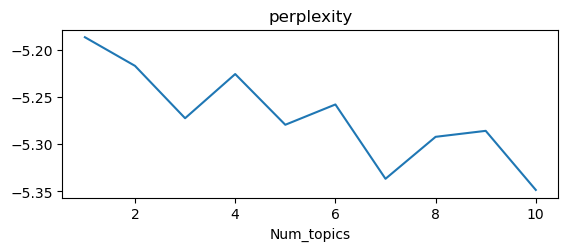

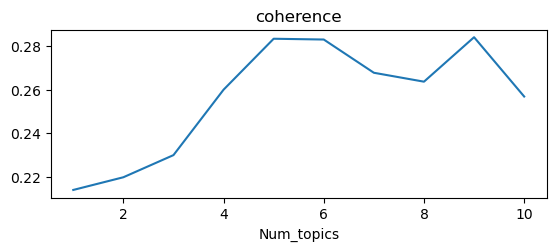

In [60]:
# perplecxity
perplexity_values = []

for i in range(1,11):
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(lda_model.log_perplexity(corpus))

# coherence    
coherence_values = []

for i in range(1,11):
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model = CoherenceModel(model = lda_model, texts = keyword2['lemmatization'], dictionary = dictionary)
    coherence_lda = coherence_model.get_coherence()
    coherence_values.append(coherence_lda)    
    
x = range(1,11)

plt.subplot(2,1,1)
plt.plot(x, perplexity_values)
plt.title("perplexity")
plt.xlabel("Num_topics")
plt.show()


plt.subplot(2,1,2)
plt.plot(x, coherence_values)
plt.title("coherence")
plt.xlabel("Num_topics")
plt.show()

In [52]:
perplexity_values[7:10]

[-5.276537736012418, -5.309637575135079, -5.317135341573106]

In [53]:
coherence_values[7:10]

[0.2625998721400832, 0.28718323402514956, 0.3024825266564657]

### 주제
- topic을 나타내는 단어(코퍼스)들만 도출됨
- 해당 토픽을 나타내는 단어들을 보고 토픽의 이름을 정해줘야함
- 반복되는 단어들이 많아서 알기 어렵다면 단어의 갯수를 늘려서 확인해보는 것도 좋음
- 람다 값 조절해서 토픽 파악하는게 베스트

In [57]:
NUM_TOPICS = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=100) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=10) #총 n개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.113*"layer" + 0.048*"method" + 0.046*"cell" + 0.044*"structure" + 0.035*"device" + 0.033*"mtj" + 0.031*"junction" + 0.028*"stack" + 0.027*"access" + 0.024*"process"')
(1, '0.074*"device" + 0.074*"line" + 0.069*"cell" + 0.040*"array" + 0.032*"word" + 0.024*"bit" + 0.018*"method" + 0.017*"chip" + 0.016*"type" + 0.015*"material"')
(2, '0.098*"line" + 0.056*"cell" + 0.053*"transistor" + 0.034*"source" + 0.027*"data" + 0.026*"device" + 0.026*"bit" + 0.020*"access" + 0.015*"plurality" + 0.014*"plane"')
(3, '0.117*"circuit" + 0.039*"method" + 0.029*"array" + 0.029*"chip" + 0.024*"access" + 0.023*"substrate" + 0.023*"cell" + 0.020*"interconnect" + 0.015*"plurality" + 0.014*"portion"')
(4, '0.174*"region" + 0.084*"structure" + 0.035*"area" + 0.030*"interconnection" + 0.023*"gate" + 0.023*"access" + 0.023*"device" + 0.022*"layer" + 0.021*"voltage" + 0.018*"pattern"')
(5, '0.177*"layer" + 0.057*"device" + 0.052*"electrode" + 0.042*"metal" + 0.031*"structure" + 0.029*"contact" + 0.022*"acce

# 해석
- lambda 값에 따라 해석이 바뀔 수 있음
- lambda는 토픽(주제) 내에서 단어의 가중치를 조절하는 파라미터
- 1에 가가울수록 해당 토픽 내에서 중요한 단어들이 균형있게 포함되어 나타남. 해당 단어가 동일하게 중요하다는 뜻
- 0에 가까워질수록 해당 토픽 내에서만 등장하는 단어들이 강조됨. 해당 토픽을 대표하는 핵심 단어라고 볼 수 있음
- 더 궁금하면 우측 하단 설명 1.saliency, 2.relevance 클릭해서 확인

In [58]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\daybi\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [61]:
from gensim import corpora
from gensim.models import LdaModel


# 모델 저장
ldamodel.save('LDA_mram')

# 나중에 모델을 불러오려면:
# lda_model = LdaModel.load('ldamodel')

# 저장한 모델 불러와서 결과 재확인
1. 데이터 불러오기
2. lemma -> dict 생성
3. dict을 기반으로 하는 corpus 생성
4. visualize